# Загрузка необходимых библиотек

In [1]:
import json
import urllib.request as ur
from bs4 import BeautifulSoup
import pandas as pd
import collections
from tqdm import tqdm
import unicodedata
import matplotlib.pyplot as plt

## Описание данных

Загрузка начального файла с записями и его просмотр.

In [2]:
with open("../records.json", 'r', encoding='utf-8') as file:
    records = json.load(file)
pd.DataFrame([records[0]])

id             datetime digest_number    state  \
0  18584  2021-07-29 22:53:55          None  UNKNOWN   

                                               title description  type  \
0  How to get a free SSL certificate for Kubernet...        None  None   

  category                                           keywords language  \
0     None  [{'name': 'Kubernetes', 'foss': True, 'generic...  ENGLISH   

                                                 url  
0  https://medium.com/@jorge.gongora2610/how-to-g...

In [3]:
categories = collections.Counter([record['category'] for record in records if record['language'] == 'RUSSIAN'])
pd.DataFrame([categories])

WEB  SECURITY  INTROS  DATA_SCIENCE  None  ORG  OPENING  DEVOPS  KnD  \
0  429       320      62            51  5130  341       53     390  756   

   SPECIAL  ...  GAMES  LAW  MISC  EDUCATION  HARDWARE  EVENTS  HISTORY  DIY  \
0      336  ...     78   42   126         38        81     112       13   45   

   SYSTEM  MANAGEMENT  
0       9           4  

[1 rows x 27 columns]

In [4]:
listC = list(categories)
listCategories = []
categoriesCount = []
for i in range(len(list(categories))):
    if listC[i] != None:
        listCategories.append(listC[i])
        categoriesCount.append(categories[listC[i]])

/var/folders/s8/d14ydvrs51j2vffx404b3k0r0000gn/T/ipykernel_5808/494154317.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y1, 'o-r', color='#139CFF', alpha=0.7, lw=5, mec='b', mew=2, ms=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


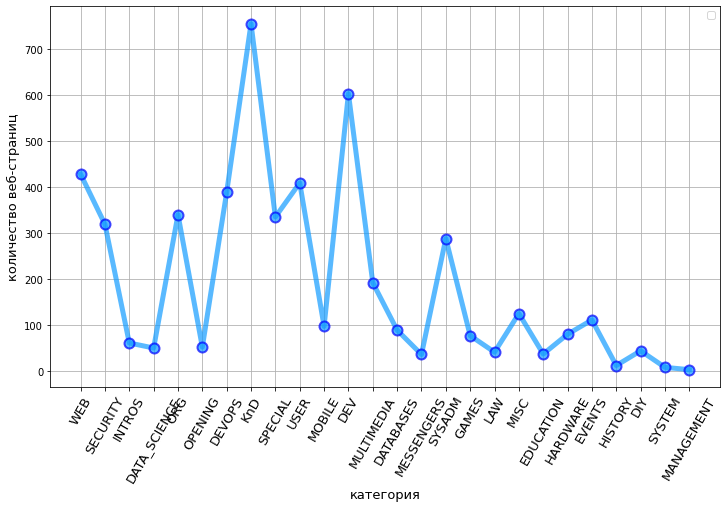

In [5]:
x = listCategories
y1 = categoriesCount
axis_font = {'size':'13'}
plt.figure(figsize=(12, 7))
plt.plot(x, y1, 'o-r', color='#139CFF', alpha=0.7, lw=5, mec='b', mew=2, ms=10)
plt.xlabel("категория", **axis_font)
plt.ylabel("количество веб-страниц", **axis_font)
plt.xticks(rotation=60, **axis_font)
plt.legend()
plt.grid(True)
plt.savefig('pp.jpeg', dpi=300, bbox_inches = "tight")

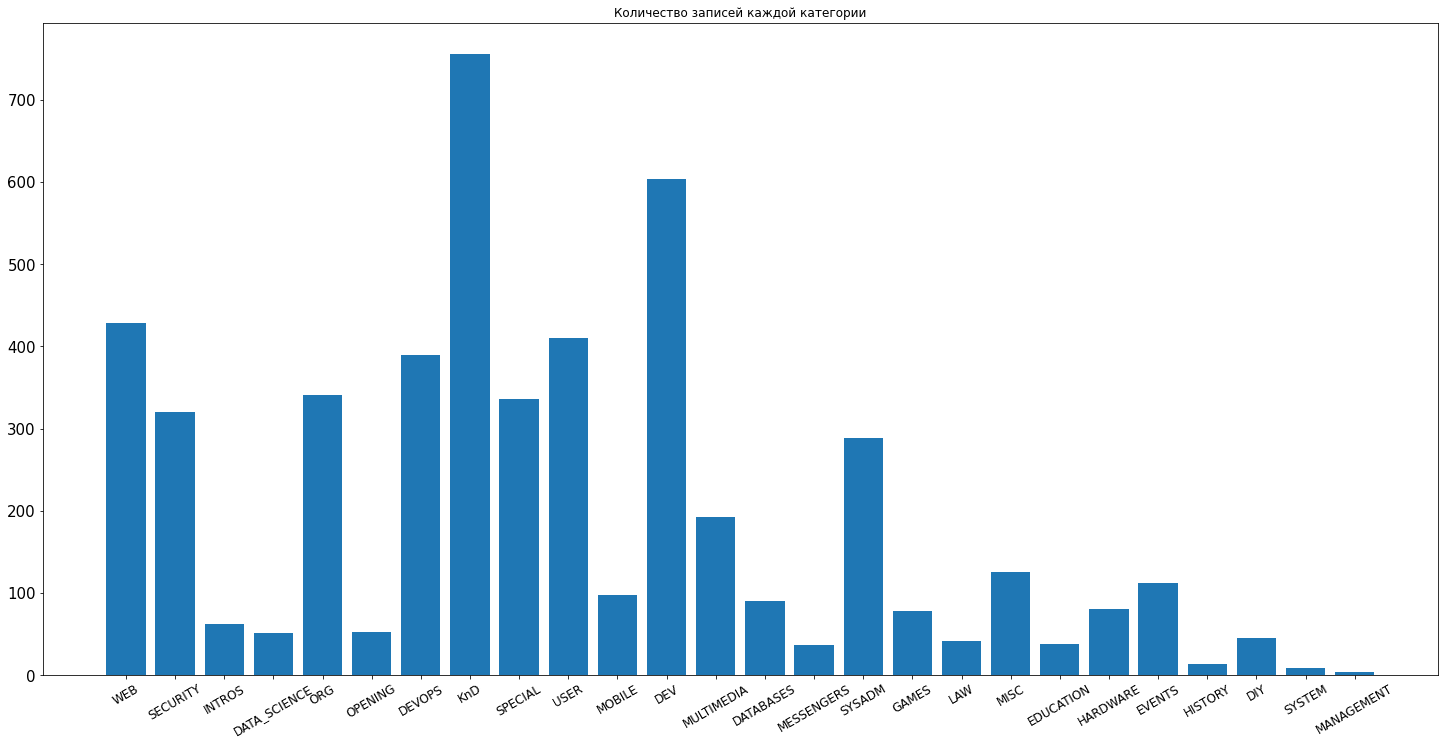

In [6]:
fig, ax = plt.subplots()
ax.bar(listCategories, categoriesCount)
ax.tick_params(axis='y', labelsize = 15)
ax.tick_params(axis = 'x',rotation = 30, labelsize = 12)
fig.set_figwidth(25)  
fig.set_figheight(12)
plt.title("Количество записей каждой категории")
plt.savefig('hist.jpeg', dpi=300, bbox_inches = "tight")
plt.show()

In [7]:
dictCategories = dict(categories)
sortedKeys = sorted(dictCategories, key=dictCategories.get, reverse=True) 

In [8]:
strings = []
categoriesStr = ""
lens = [15, 10, 15, 23, 4, 23]
for datasetLen in lens:
    for categoryIndex in range(0, datasetLen+1):
        if sortedKeys[categoryIndex] != None:
            categoriesStr += str(sortedKeys[categoryIndex]) + " "
    strings.append(categoriesStr[0:-1])
    categoriesStr = ""

In [9]:
with open(r"classesForDatasets.txt", "w") as file:
    for line in strings:
        file.write(line + '\n')

# Формирование своего файла с записями на русском языке

In [10]:
class Record(object):
    """класс для хранения записей, которые имеют поле language = 'russian' 
    и содержат любую категорию в поле category, но не None"""
    def __init__(self, text = "", category = "", url = "", isDownloaded = True, fileNameBeforeProcessing = "", fileNameAfterProcessing = "", id = -1):
        self.__text = text
        self.__category = category
        self.__url = url
        self.__id = id
        self.__isDownloaded = isDownloaded
        self.__fileNameBeforeProcessing = fileNameBeforeProcessing
        self.__fileNameAfterProcessing = fileNameAfterProcessing
    def toJSON(self):
        return json.dumps(self, default=lambda o: o.__dict__, indent=4)
    def setUrl(self, url):
        self.__url = url
    def setIsDownloaded(self, isDownloaded):
        self.__isDownloaded = isDownloaded
    def setFileNameBeforeProcessing(self, fileNameBeforeProcessing):
        self.__fileNameBeforeProcessing = fileNameBeforeProcessing
    def setfFileNameAfterProcessing(self, fileNameAfterProcessing):
        self.__fileNameAfterProcessing = fileNameAfterProcessing
    def setCategory(self, category):
        self.__category = category
    def getCategory(self):
        return(self.__category)
    def getIsDownloaded(self):
        return(self.__isDownloaded)
    def getText(self):
        return(self.__text)
    def setId(self, id):
        self.__id = id
    def setText(self, text):
        self.__text = text

In [11]:
def getTextContent(url):
    """получение текстовых данных с веб-страницы"""
    html = ur.urlopen(url).read()
    soup = BeautifulSoup(html)
    for data in soup(["script", "style"]):
        data.extract()
    allText = soup.body.get_text()
    splitText = allText.splitlines()
    lines = [line.strip() for line in splitText]
    cleanLines = [splitLine.strip() for line in lines for splitLine in line.split("  ")]
    text = '\n'.join(line for line in cleanLines if line)
    return text

In [12]:
def getTextsOfCategory(records, category):
    """получение всех текстов, для каждого из которых создание и заполнение объекта класса,
    на русском языке одной категории"""
    finishedText = ""
    fileName = 1
    for i in range(len(records)):
        if records[i]['language'] == "RUSSIAN" and records[i]['category'] == category:
            text = Record()
            url = records[i]['url']
            try:
                finishedText = getTextContent(url)
                text.setText(finishedText)
                fileName += 1
            except:
                text.setIsDownloaded(False)
            text.setId(records[i]['id'])
            text.setCategory(category)
            text.setUrl(url)
            texts.append(text)

In [13]:
texts = []
for category in tqdm(list(categories)):
    if category != None:
        getTextsOfCategory(records, category)

100%|██████████████████████████████████████████| 27/27 [46:32<00:00, 103.42s/it]


In [20]:
pd.DataFrame(texts[0].__dict__, index=[0])

_Record__text _Record__category  \
0  Хабр\nβ Открыть список\nКак стать автором\nВсе...               WEB   

                      _Record__url  _Record__id  _Record__isDownloaded  \
0  https://habr.com/ru/post/570448        18726                   True   

  _Record__fileNameBeforeProcessing _Record__fileNameAfterProcessing  
0

### Загрузка массива записей в файл типа json

In [21]:
dictTexts = []
for i in range(len(texts)):
    dictTexts.append(texts[i].__dict__)
with open('../russianRecords.json', 'w', encoding='utf-8') as outfile:
        json.dump(dictTexts, outfile, indent=4, ensure_ascii=False)

# Создание датасета

In [22]:
dsTextCount = 400
dsCategories = ['KnD', 'DEV', 'WEB', 'USER']
#dsCategories = sortedKeys[1:24]
dsCategoriesCount = 4

In [23]:
def countDownloadedTexts(texts):
    """подсчет количества веб-страниц, которые открылись"""
    trueTextsCount = 0
    for i in range(len(texts)):
        if texts[i].isDownloaded == True:
            trueTextsCount+=1
    print("Количество загруженных текстов = {}".format(trueTextsCountnt))

In [24]:
def getRecodrsOfCategory(count, category, index):
    """получить count документов category"""
    if categories[category] <= count:
        count = categories[category]
    resultTexts = []
    maxCount = 1
    for i in range(len(texts)):
        if texts[i].getCategory() == category and texts[i].getIsDownloaded() == True:
            if maxCount > count:
                break
            maxCount += 1
            resultTexts.append([texts[i].getCategory(), index, unicodedata.normalize("NFKD", texts[i].getText())])
            #resultTexts.append([texts[i].category, index, texts[i].text])
    return resultTexts

In [25]:
def createDataset(categories, count):
    """создание датасета, который включает count документов каждой из categories"""
    result = []
    index = 0
    for category in categories:
        result += getRecodrsOfCategory(count, category, index)
        index += 1
    df = pd.DataFrame(result, columns=['Category', 'indexCategory', 'Document'])
    return df

In [26]:
dfDataset = createDataset(dsCategories, dsTextCount)
dfDataset.to_csv('../datasets/dataset_{}_{}.csv'.format(dsTextCount, dsCategoriesCount))
dfDataset

Category  indexCategory  \
0         KnD              0   
1         KnD              0   
2         KnD              0   
3         KnD              0   
4         KnD              0   
...       ...            ...   
1595     USER              3   
1596     USER              3   
1597     USER              3   
1598     USER              3   
1599     USER              3   

                                               Document  
0     ВойтиРегистрацияГлавнаяНовостиДистрибутивыСта...  
1     Профиль: Аноним (вход | регистрация)\nНОВОСТИ ...  
2     Меню\nГлавная\nНовости\nКатегории\nИнструкции\...  
3     Профиль: Аноним (вход | регистрация)\nНОВОСТИ ...  
4     LINUX.ORG.RU\nРегистрация -\nВход\nИмя:\nПарол...  
...                                                 ...  
1595  Профиль: Аноним (вход | регистрация)\nНОВОСТИ ...  
1596  Профиль: Аноним (вход | регистрация)\nНОВОСТИ ...  
1597  LINUX.ORG.RU\nРегистрация -\nВход\nИмя:\nПарол...  
1598  Меню\nГлавная\nНовости\nКатегории\nИнструкции\...  
1599  Профиль: Аноним (вход | регистрация)\nНОВОСТИ ...  

[1600 rows x 3 columns]